# CSCE633 Fall 2022 (Total 100 pts) - change filename to include your name

**Machine Learning**

**Homework 3**

Instructor: Yoonsuck Choe

October 16, 2022


---

**Student name:** Cheng, Cheng-Yun


---

# Common instructions (Read carefully)

Hint: 
* Go to View $\rightarrow$ Collapse sections to quickly jump to the problems you are working on. 
* Click triple line icon near the top left to see the table of contents for quick navigation.


**Submission:**

1. Rename the file to **633-22fall Machine Learning HW3 - lastname firstname.ipynb**.
2. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
3. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
>> Important: Unselect "[ ] Show output" to suppress diff of execution outputs.
>> Jupyter notebook: If you're using Jupyter notebook on your local machine, run %history -g -f filename.log  and submit the log file. 
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markdown language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.


**NEW: Including images/screenshots**

When including screenshots directly into the text cell, the markup source can get too long. To avoid this, you can upload your images to google drive, make them publicly viewable, get the share link, get the id string  from the link (for example, 1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy), and insert a tag like below:  
```
<img src="https://drive.google.com/uc?export=view&id=1IDUkDGqQ1xSKOT3Wg8SKgAlKsDIdUQUy"> 
```


# Section I: Entropy

Given a random variable $X$ that can take on values $\{ \oplus, \ominus \}$,
the entropy is defined as:

$$E(X) = - \sum_{x \in \{\oplus, \ominus\}} P(X=x) \log_2 P(X=x).$$

Since $P(X=\oplus) + P(X=\ominus) = 1$, $E(X)$ can be rewritten as a function of $P(X=\oplus)$, substituting $P(X=\ominus)$ with $1-P(X=\oplus)$.

Letting $p_\oplus = P(X=\oplus)$ in short:
$$ E(X) = f(p_\oplus) = -p_\oplus \log_2 p_\oplus - (1-p_\oplus) \log_2 (1 - p_\oplus). $$ Figure below shows how $f(p_\oplus)$ behaves as $p_\oplus$ changes.

<figure>
<center>
<img 
 src="https://drive.google.com/uc?export=view&id=1PRpDVWLHnLgs0GQyUU-L-_oAteRUKdM_" height="300px"> 
<figcaption>Figure 1. Entropy</figcaption></center>
</figure>

# Problem 1 (Written: 5 pts)

**Problem 1 (Written: 5 pts):**

Extend the above analysis to a random variable $Y$ that can take on values
$\{ \alpha, \beta, \gamma \}$. Given $p_\alpha = P(Y = \alpha)$, etc.,

(1) Derive $E(Y)$ as a function of $p_\alpha$ and $p_\beta$:

$$E(Y) = f(p_\alpha, p_\beta) = ... $$

Note: $p_\alpha+p_\beta+p_\gamma = 1.0$.

(2) For which values of  $p_\alpha$ and $p_\beta$ 
does $E(Y)$ become maximal (no need to derive it exactly from $f(p_\alpha,p_\beta)$--consider
when it is maximal in the 2-value case)? You don't need to derive this from the equation. Just use your intuition.

(3) Explain why (you don't need to provide a formal proof).


**Answer:**

(1) $E(Y) = f(p_\alpha, p_\beta) = -p_α log_2 p_α - p_β log_2 p_β -(1 - p_α - p_β) log_2 (1 - p_α - p_β)$

(2) $p_α = \frac{1}{3}, p_β = \frac{1}{3}$

(3) Entropy measures the average uncertainty of events. When $p_α = \frac{1}{3}, p_β = \frac{1}{3},$and $p_γ = \frac{1}{3}$, the random variable Y is the most uncertain. 

# Problem 2 (Program: 20 pts)

**Problem 2 (Program: 20 pts)**

Write a short program to calculate $f(p_\alpha, p_\beta)$ derived above,
and obtain the $E(Y) = f(p_\alpha, p_\beta)$ values for all combinations of $p_\alpha, p_\beta \in \{ 0.0, 0.01, 0.02, ... , 0.99, 1.0 \}$, and plot in 3D (python: plot_surface; or draw by hand). You have to be careful because:

* log(0) will throw an error, so you have to check for the occurrence of (0 * log(0)) and make that 0 before log(0) gets evaluated. Alternatively, you can start with a value close to 0: 0.001, 0.01, 0.02,  ..., 0.99, 1.0.

* Also, you have to plot for the $(p_\alpha, p_\beta)$ that sums up to less than or equal to 1.0 (because $p_\alpha + p_\beta + p_\gamma =1$ must be maintained, and if $p_\alpha + p_\beta > 1$, then this constraint cannot be maintained).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Z contains NaN values. This may result in rendering artifacts.


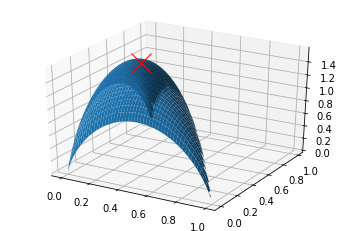

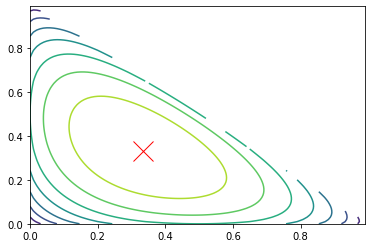

In [27]:
# Write your code here.

import numpy as np
import matplotlib.pyplot as plt

#-------------------
# Entropy function f(Pa,Pb) = E(Y)
#-------------------
def f(Pa,Pb):
  # IMPLEMENT THIS: replace this dummy function with the actual E()
  # - be careful with log(0) (cases when either Pa or Pb is 0)
  def cal(p):
    if p == 0:
      return 0
    else:
      return p*np.log2(p)

  if 1-Pa-Pb < 0:
    return np.nan
  else:
    return -(cal(Pa) + cal(Pb) + cal(1-Pa-Pb))

#-------------------
# Plot 
#-------------------
x = np.arange(0.0, 1.0, 0.01)
y = np.arange(0.0, 1.0, 0.01)
xx, yy = np.meshgrid(x, y)
zz = xx.copy()
for i in range(xx.shape[0]):
  for j in range(xx.shape[0]):
    zz[i][j] = f(xx[i][j], yy[i][j])
#------
# 3D surface plot
#------

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,zz,zorder=0)

# Mark point where E is maximum. 
ax.plot([0.333],[0.333],[f(0.333,0.333)],marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red",zorder=10)

#------
# show contour plot as well
#------

fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.contour(xx,yy,zz)
# Mark point where E is maximum. 

ax2.plot(0.333,0.333,marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red")

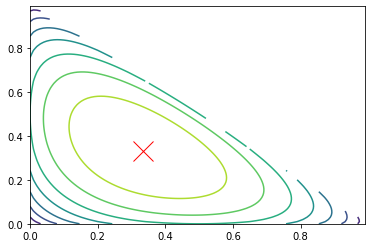

In [15]:
mask=xx+yy<=1
ff=zz

fig3 = plt.figure()
ax3 = fig3.add_subplot()

# multiply with mask to get rid of invalid region
ax3.contour(xx,yy,ff*mask)

# plot
ax3.plot(0.333,0.333,marker="x",markerfacecolor="red",markersize=20, markeredgecolor="red")


# Problem 3 (Written: 5 pts)

**Problem 3 (Written: 5 pts)**

Based on the insight from above, when you have a random variable $X$ that can take on
four different discrete values (say, $\{a, b, c, d\}$), then (1) what should 
$P(X=a)$ etc. be so that the entropy of $X$ is maximized? (2) Also, what is the
value of the maximum entropy? (Note: You don't need to provide a formal proof. Simply generalize from what you know for the two value case: $\oplus$ and $\ominus$.)


**Answer:**

(1) $P(X=a) = \frac{1}{4}, P(X=b) = \frac{1}{4}, P(X=c) = \frac{1}{4}, P(X=d) = \frac{1}{4}$

(2) $E(X) = -(\frac{1}{4} log_2 \frac{1}{4}) × 4 = 2$


# Section II: Decision Tree Learning

Consider the data set below (Table 1), for problems 4 and 5. Note: Problem 6 has a different data set.

<b>TABLE 1</b>

||HP|Drivetrain|Body|Price|Target|
|---:|:---|:---|:---|:---|:---|
|0|low|rwd|sedan|high|N|
|1|medium|awd|hatchback|low|Y|
|2|high|fwd|suv|high|Y|
|3|low|fwd|sedan|low|N|
|4|high|awd|hatchback|low|Y|
|5|high|rwd|suv|low|N|
|6|high|awd|hatchback|high|Y|
|7|medium|fwd|suv|low|N|
|8|low|fwd|suv|high|N|
|9|high|awd|suv|high|Y|
|10|medium|awd|sedan|low|Y|
|11|high|fwd|hatchback|low|Y|
|12|low|awd|sedan|low     |Y|

# Problem 4 (Written: 20 pts)

**Problem 4 (Written: 20 pts)**

Consider Table 1. above. 

Calculate the following **by hand** and show all intermediate results 
(you may use a calculator for intermediate numerical results).


(1) Calculate the entropy of the training set above. Hint: count positive and negative samples, and get their probabilities $p_\oplus$ and $p_\ominus$.

(2) Calculate the information gain for each of the four attributes. Hint: split the data set based on the attribute values for each attribute, and compute the information gain. For example, for the **Drivetrain** attribute, there are three possible values: awd, fwd, and rwd. 

(3) Which one is the best attribute to test first?

**Answer:**

(1) $E = -\frac{8}{13} log_2 \frac{8}{13} -\frac{5}{13} log_2 \frac{5}{13} = 0.961$

(2) ![](https://drive.google.com/uc?export=view&id=1f3fX3nwvGeYcgn1H9Q8F__BWhk_MxtUY)  

(3) Drivetrain is the best attribute to test first.

# Problem 5 (Program: 25 pts)

**Problem 5 (Program: 25 pts)**
Again, consider the data set in  Table 1 above.

(1) Write a short program to compute the information gain, given the original data set's postive/negative sample count, and the resulting branches based on the attribute values and their positive/negative sample counts. Below is a stub code, which shows the testing scenario with the situation similar to the illustration shown in the figure below (Figure 2). Note that the "after" matrix can have an arbitrary number of rows (for example, if the attribute has three possible values, there will be three rows in the matrix). The function must 

1. support attributes with an arbitrary number of attribute values, and 
2. check for error in the arguments (if +/- count before and after all sums up to be the same).

(2) Using the data set in Table 1, for all four attributes, compute the info gain for each, using your info_gain() function, and report the resulting values.

(3) After choosing the best attribute from step (2), repeat the process for the resulting branches (the subsets), to select the next attribute to test for each branch. If some branch is already a leaf, no need to repeat the info_gain computation.

<figure>
<center>
<img 
 src="https://drive.google.com/uc?export=view&id=1mzt9xb2L7Xwf7Ka6vrt51b_Ws58M-zPT" height="450px"> 
<figcaption><b>Figure 2.</b> Information Gain example. Present your results in this style.</figcaption></center>
</figure>


**Answer:** 

(1) Fill out the code cell below

(2) Info gain for 
* HP : info gain = 0.200
* Drivetrain : info gain = 0.588
* Body : info gain = 0.280
* Price : info gain = 0.000  

Choose Drivetrain as the first attribute.

(3) Best attribute from step (2) = Drivetrain 
* Branch: Drivetrain = fwd 
  * HP: info gain = 0.971
  * Body: info gain = 0.420
  * Price: info gain = 0.020   

  Choose HP as the second attribute.
  
![](https://drive.google.com/uc?export=view&id=19tC8hQN0b4sniZB5WGtLwNuQ2AmHc5UV) 

In [28]:
# Problem 5 Code 

import numpy as np
import matplotlib.pyplot as plt

# IMPLEMENT THE FUNCTIONS BELOW

# 1. define your entropy function here. Note: this has to be defined specifically for this case: p+ and p-. 
#  The entropy function defined in problem 2 is for three possible values, not +/-.  
def Entropy(P_plus):
  P_minus = 1-P_plus
  if P_plus * P_minus != 0:
    return -1 * (P_plus*np.log2(P_plus) + P_minus*np.log2(P_minus))
  else:
    return 0
  # You need to treat edge cases when P_plus = 0.0 or 1.0. 
  # return ... some function of P_plus and P_minus.  

# alternatively, you can define it like below.
def Entropy2(num_positive, num_negative):
  total = num_positive + num_negative
  if total == 0:
    return 0
  P_plus = num_positive / total
  return Entropy(P_plus)
  

# 2. define your info_gain function here 
def info_gain(before, after):

  # "before" is a vector of two values = [#positive, #negative]
  # "after" is a matrix of n rows and 2 columns. Each row corresponds to the attribute value, and the columns correspond to #positive, #negative.
  # print("Before testing:")
  # print(before)
  
  # print("After testing:")
  # print(after)

  # You have to define the value below.
  # You cannot directly plug in the +,- value vector into the Entropy function.
  # You have to first convert the +,- values to probabilities p+ and p-.
  #  
  # gain = .....
  # 
  # - the example below just returns a default value.

  # check number of positive/negative data in before and after
  n_after = np.sum(after, axis=0)
  if before[0] != n_after[0]:
    print("number of positive data dose not match")
  if before[1] != n_after[1]:
    print("number of negative data dose not match")

  n_source = sum(before)
  gain = Entropy2(before[0], before[1])
  for (positive, negative) in after:
    n_attribute = positive + negative
    gain -= Entropy2(positive, negative) * (n_attribute/n_source)
  return gain

# 3. Test function (see Figure 2 above)
#
# These values are exactly the same as the values in Figure 2, so you can check your results against the 
# results shown in Figure 2.

# before = np.array([9,5])  # +9, -5 is entered like this (9 positive,5 negative samples)
# after  = np.array([[3,4], [6,1]]) # two rows, for two attribute values High and Normal, +3/-4 and +6/-1 
# info_gain(before, after)

# Or, you can just call it like this: 
# info_gain([9,5], [[3,4], [6,1]])


In [17]:
dic = {"HP": [[8,5], [[1,3],[2,1],[5,1]]], 
       "Drivetrain": [[8,5], [[0,2],[6,0],[2,3]]], 
       "Body": [[8,5], [[2,2],[4,0],[2,3]]], 
       "Price": [[8,5], [[5,3],[3,2]]]}
gain = 0
attribute = None
for atb in dic:
  g = info_gain(dic[atb][0], dic[atb][1])
  print(f"{atb:10}: Info gain = {g:.3f}")
  if g > gain:
    gain = g
    attribute = atb
print(f"\nChoose {attribute} as the first attribute.")

HP        : Info gain = 0.200
Drivetrain: Info gain = 0.588
Body      : Info gain = 0.280
Price     : Info gain = 0.000

Choose Drivetrain as the first attribute.


In [18]:
dic = {"HP": [[2,3], [[0,2],[0,1],[2,0]]],
       "Body": [[2,3], [[0,1],[1,0],[1,2]]],
       "Price": [[2,3], [[1,2],[1,1]]]}
gain = 0
attribute = None
for atb in dic:
  g = info_gain(dic[atb][0], dic[atb][1])
  print(f"{atb:5}: Info gain = {g:.3f}")
  if g > gain:
    gain = g
    attribute = atb
print(f"\nChoose {attribute} as the second attribute.")

HP   : Info gain = 0.971
Body : Info gain = 0.420
Price: Info gain = 0.020

Choose HP as the second attribute.



# Problem 6 (Written + Program: 25 pts)

**Problem 6 (Written + Program: 25 pts)**

In this problem, you will use the scikit-learn package.

Apply your info_gain function to analyze the following data set (TABLE 2) and report the results. Note that this is a different data set. All attributes can only have two values, due to the scikit-learn's implementation. 

(1) Repeat the steps in Problem 5(2) applied to data in Table 2 below. Show the output of your info_gain function. For this, use your program from problem 5, not scikit-learn.

(2) Repeat the steps in Problem 5(3) applied to data in Table 2 below. Show the output of your info_gain function. For this, use your program from problem 5, not scikit-learn.

(3) Verify your results using scikit-learn's decision tree algorithm (code provided below), test the results and compare with your results in (1) and (2) right above.
  *  Note: scikit-learn does not support multi-value attributes (thus all the branches are binary). The data set below is set up so that you can use sci-kit-learn (you cannot use scikit-learn for the data in Table 1, since it includes multi-value attributes). 

**NOTE: the data set may look similar to the one in the slides, but it is not identical, so the results will be different. **

<b>TABLE 2</b>



|HP| Drivetrain| Body| Price| Target|
|---:|:---|:---|:---|:---|
|low| rwd| suv| high| N|
|high| fwd| suv| high| Y|
|low| rwd| hatchback| low| N|
|high| fwd| hatchback| low| Y|
|high| rwd| suv| low| N|
|high| fwd| suv| low| N|
|low| fwd | hatchback| high| Y|
|low| fwd| hatchback | low| Y|


**Answer:**

(1) Info gain for 
* HP: info gain = 0.000
* Drivetrain: info gain = 0.549
* Body: info gain = 0.189
* Price: info gain = 0.049  

Choose Drivetrain as the first attribute.  

(2)
* Branch: Drivetrain = fwd
  * HP: info gain = 0.171
  * Body: info gain =  0.322
  * Price: info gain = 0.171  

  Choose Body as the second attribute.  

* Branch: Body = suv
  * HP: info gain = 0.000
  * Price: info gain = 1.000  

  Choose Price as the third attribute.
  
![](https://drive.google.com/uc?export=view&id=1fLIy6xtBcdxi8Pkcq6R7gyoNfFFLPlR3) 

In [19]:
# Problem 6, part (1) and (2) code 

# write your function calls here

# (1)
dic = {"HP": [[4,4], [[2,2],[2,2]]],
       "Drivetrain": [[4,4], [[0,3],[4,1]]],
       "Body": [[4,4], [[1,3],[3,1]]],
       "Price": [[4,4], [[2,3],[2,1]]]}
gain = 0
attribute = None
for atb in dic:
  g = info_gain(dic[atb][0], dic[atb][1])
  print(f"{atb:10}: Info gain = {g:.3f}")
  if g > gain:
    gain = g
    attribute = atb
print(f"\nChoose {attribute} as the first attribute.")

HP        : Info gain = 0.000
Drivetrain: Info gain = 0.549
Body      : Info gain = 0.189
Price     : Info gain = 0.049

Choose Drivetrain as the first attribute.


In [20]:
# (2)
dic = {"HP": [[4,1], [[2,0],[2,1]]],
       "Body": [[4,1], [[1,1],[3,0]]],
       "Price": [[4,1], [[2,1],[2,0]]]}
gain = 0
attribute = None
for atb in dic:
  g = info_gain(dic[atb][0], dic[atb][1])
  print(f"{atb:5}: Info gain = {g:.3f}")
  if g > gain:
    gain = g
    attribute = atb
print(f"\nChoose {attribute} as the second attribute.")

HP   : Info gain = 0.171
Body : Info gain = 0.322
Price: Info gain = 0.171

Choose Body as the second attribute.


In [29]:
dic = {"HP": [[1,1],[[0,0],[1,1]]],
       "Price": [[1,1],[[0,1],[1,0]]]}
gain = 0
attribute = None
for atb in dic:
  g = info_gain(dic[atb][0], dic[atb][1])
  print(f"{atb:5}: Info gain = {g:.3f}")
  if g > gain:
    gain = g
    attribute = atb
print(f"\nChoose {attribute} as the third attribute.")

HP   : Info gain = 0.000
Price: Info gain = 1.000

Choose Price as the third attribute.



**Answer:**
(3) Enter the data in the code cell below and run it to verify your results above.

The Scikit-Learn decision tree algorithm produced the same results as mine.

...
...


[Text(0.4, 0.875, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.625, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.375, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

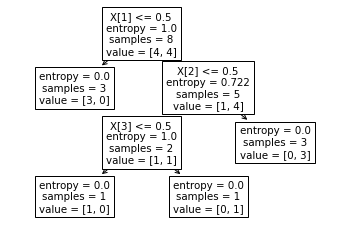

In [22]:
# Problem 6, part (3) code
#
# Testing scikit-learn's decision tree implementation. 
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np 

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Outlook attribute, Sunny = 0, and Overcast = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this 
#
# Column order: HP, Drivetrain, Body, Price
# Values:
#    HP:          low=0, high=1
#    Drivetrain:  rwd=0, fwd=1
#    Body:        suv=0, hatchback=1
#    Price:       low=0, high=1 
# Target:         N=0, Y=1
X = [[0,0,0,1], 
     [1,1,0,1],
     [0,0,1,0], 
     [1,1,1,0], 
     [1,0,0,0], 
     [1,1,0,0],
     [0,1,1,1], 
     [0,1,1,0]]

# Enter the target data (PlayTennis) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this 

y = [0, 
     1, 
     0, 
     1,
     0, 
     0, 
     1, 
     1]
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b]. 
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg].  
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in)
tree.plot_tree(clf)


# [Extra Code] Full Decision Tree (Exercise Only, No credit) 

In this section, you will write a complete decision tree learning algorithm, and display the results as a tree. Again, this is not required, so no need to submit anything for this part. 

**This code is provided only as an exercise: No credit/points**

Implement a full Decision Tree algorithm, and test it on the Section II data set. Use the starter code below. It provides the data structure and plotting function.

* **Input**: Data Set
* **Output**: Decision tree plot





 Decision Tree dump: This is a mock example just to test the plotting function.


Attr = [__Waiting Staff__], Values: ['part-time', 'full-time', 'owner', 'family']
Child 0:    Leaf = False
Child 1:    Attr = [__Price__],     Values: ['$', '$$', '$$$']
    Child 0:        Leaf = False
    Child 1:        Leaf = True
    Child 2:        Leaf = True
Child 2:    Attr = [__Patron__],     Values: ['none', 'some', 'full']
    Child 0:        Leaf = False
    Child 1:        Attr = [__Price__],         Values: ['$', '$$', '$$$']
        Child 0:            Leaf = False
        Child 1:            Leaf = True
        Child 2:            Leaf = True
    Child 2:        Leaf = True
Child 3:    Leaf = True



 Decision Tree plot: This is a mock example just to test the plotting function.




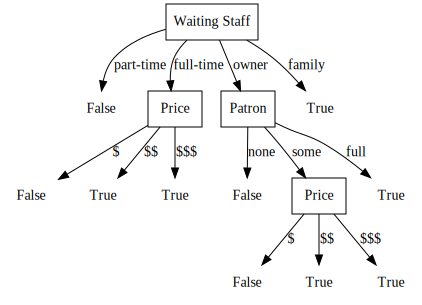

In [23]:
'''

  Decision tree: starter code 

'''

import numpy as np
import types
import matplotlib.pyplot as plt
import graphviz
import uuid

#------------------------------------------------------------------
#
# DT: Decision tree class 
# 
# - you can mostly leave this alone
# - edit the DT_learn class below. 
# - this may only be useful for displaying
#
#------------------------------------------------------------------
class DT:
  '''
  DT class 

  - it can be a leaf (Yes/No) or a subtree

  '''

  #-------------------
  # __init__ function
  #-------------------
  def __init__(self, decision=None, attr=None, values=None, children=None):
    '''
    decision: if this alone is given, a leaf node will be created.
        - example: dt = DT(decision=False)

    attr, values, children : if these are given together, a subtree will be created.
        - example: dt = DT(attr="Patron", values=["Full", "Some", "None"], children=[None, None, None])
    '''

    # 1. Leaf
    if decision != None:

      self.decision = decision
      self.is_leaf = True

    # 2. tree
    else:

      self.attr     = attr
      self.values   = values
      self.children = children
      self.is_leaf  = False

  #-------------------
  # print function
  #------------------
  def print(self,indent=""):
    '''
    print : print the node content
      indent: to plot child tree with indentation, e.g., "     "
    '''

    # 1. Leaf
    if (self.is_leaf):
      print(indent+"Leaf = ",end="")
      print(self.decision)

    # 2. tree 
    else:

      print(indent+"Attr = [__{}__]".format(self.attr), end=", ")
      print(indent+"Values:",end=" ")
      print(self.values)

      # recurse into children
      n = 0
      for child in self.children:
        print(indent+"Child "+str(n)+":",end="")
        # indent subtree more than current indentation for easier inspection
        child.print(indent+"    ") 
        n += 1

  #-------------------
  # uid function
  #------------------
  def uid(self):
    '''
    uid : generates a unique identifier for graph plotting
    '''

    UID = str(uuid.uuid4())
    UID = UID.replace("-","")
    UID = "id_"+UID

    return UID

  #-------------------
  # plot_tree function :  
  #------------------
  def plot_tree(self, dot_handle=None):
    '''
    plot_tree : visualize the tree using graphviz

      - dot_handle: graphviz dot handle to keep adding to the
          same graph instance through recursive calls.
          Do not specify it when calling this at the top level.

    '''
    # generated unique ID for this node
    UID = self.uid()

    # 1. new tree generation, if called without dot_handle 

    if (dot_handle == None): 
      dot = graphviz.Digraph(comment='Decision Tree')
    else:
      dot = dot_handle

    # 2. Leaf 
    if (self.is_leaf):

      dot.node(UID, label=str(self.decision), shape="plaintext")
      return UID, dot

    # 3. Subtree
    else:

      dot.node(UID, label=self.attr, shape="box")

      # recurse into children
      n = 0
      for child in self.children:

        # get child's subtree
        child_UID, dot = child.plot_tree(dot_handle=dot)

        # connect to the subtree
        dot.edge(UID, child_UID, label=self.values[n])
        n += 1

    # return graph : you must plot this from the calling routine
    return UID, dot 


#------------------------------------------------------------------
#
# DT_learn: Decision tree learning class : IMPLEMENT THIS
#
#------------------------------------------------------------------
class DT_learn:   
  '''

  DT_learn class

  '''
  #-------------------
  # init
  #------------------
  def __init__(self,input_data=None, target_data=None, attr_list=None):
    '''
    init:
      input_data : n x m array containing input vectors.
      target_data : n x 1 array containing target values.
      attr_list : 1 x m array containing attribute names.

    example:

      dt_learn = DT_learn(
          input_data=[[0,0], [0,1], [1,0], [1,1]], 
          target_data=[0, 1, 1, 0], 
          attr_list=['x1', 'x2'])

    '''

    self.input_data  = input_data
    self.target_data = target_data
    self.attr_list   = attr_list

    # for use throughout : leaf nodes
    self.leaf_f = DT(decision = False)
    self.leaf_t = DT(decision = True)

  #-------------------
  # learn : IMPLEMENT THIS
  #------------------
  def learn(self, check_attr=None, input_data=None, target_data=None, remaining_attr_list=None, default_value=None):
    '''
    - Initial call can be without any arguments.
    - Recursive calls will require the subsets, which attribute to check, and the remaining attributes
      - This is a rough guess btw. You may have to adjust it as needed.  
    '''

    # Construct your tree based on the given data : replace the mock code below
    root = DT(attr="Root", values=["v1", "v2"], children=[self.leaf_f, self.leaf_t])

    # you may have to call learn() recursively.
    
    # return final tree
    return root


#---------------------------
# Test DT class
#---------------------------

# create leaf nodes : this will be reused for all leaves.
leaf_f = DT(decision = False)
leaf_t = DT(decision = True)

# Simple tree with all leaf node children: This will be used as a subtree below

dt1 = DT(attr = "Price", values = ["$", "$$", "$$$"], children = [leaf_f, leaf_t, leaf_t])


# Another tree to be used as a subtree below.
# A bit more complex tree with 1 subtree as a child.
# - You can simply put a subtree in the children list, as shown below.

dt2 = DT(attr = "Patron", values = ["none", "some", "full"], children = [leaf_f, dt1, leaf_t])

# The final tree 
# - Note: dt2 has dt1 has sub tree, so, in this plot, "Price" attribute will appear twice

dt3 = DT(attr = "Waiting Staff", values = ["part-time", "full-time", "owner", "family"], children = [leaf_f, dt1, dt2, leaf_t])
print("\n\n\n Decision Tree dump: This is a mock example just to test the plotting function.\n\n")
dt3.print()

# create plot from the final tree

UID, dot = dt3.plot_tree()  
print("\n\n\n Decision Tree plot: This is a mock example just to test the plotting function.\n\n")
dot 

# See below for test code for DT_learn class 

Attr = [__Root__], Values: ['v1', 'v2']
Child 0:    Leaf = False
Child 1:    Leaf = True


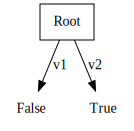

In [24]:
#----------------------------
# Test DT_learn class
#----------------------------

# 1. create instance
# - the example below shows the XOR problem, with the input attributes 'x1' and 'x2'. 
# - just use plain old Python lists for the data. 

dt_learn = DT_learn(input_data=[[0,0], [0,1], [1,0], [1,1]], target_data=[0, 1, 1, 0], attr_list=['x1', 'x2'])

# 2. train

dt = dt_learn.learn()

# 3. plot outcome

dt.print()
UID, dot = dt.plot_tree()
dot




# [Extra Code] A simple tutorial on how to plot graphs using Graphviz


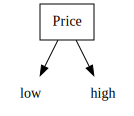

In [25]:
#---------------------------
# You can use graphviz to plot the trees
#---------------------------

import graphviz

# 1. create graph object

dot = graphviz.Digraph(comment='Decision Tree')

# 2. Add nodes

dot.node('P',label='Price',shape='box')
dot.node('Y',label='low', shape='plaintext')
dot.node('N',label='high', shape='plaintext')



# 3. Add connections
dot.edge('P','Y',label='')
dot.edge('P','N',label='')


# 4. Plot tree
dot